# Model Development

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression 

<h4>Lets load the module for Linear Regeression</h4>

In [3]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h4>How could Highway-mpg help us predict car price?</h4>

In [5]:
X = df[['highway-mpg']]
Y = df[['price']]

FIt the linear model using highway-mpg

In [6]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can output a prediction

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<h4>What is the value of the intercept (a)?</h4>

In [8]:
lm.intercept_

array([38423.30585816])

<h4>What is teh value of teh slope?</h4>

In [9]:
lm.coef_

array([[-821.73337832]])

<h4>What is the final estimated linear model we got?</h4>

<b>Price</b> = 38423.30 - 821.73 * <b>highway-mpg</b>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>
</div>
<b>Create a linear regression object?</b>


In [10]:
lm1 = LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 b): </h1>
</div>
<b>Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?</b>


In [11]:
lm1.fit(df[['engine-size']],df['price'])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>


</div>
<b>Find the slope and intercept of the model?</b>

In [12]:
print("Intercept: ",lm1.intercept_,"\nSlope: ",lm1.coef_)


Intercept:  -7963.338906281049 
Slope:  [166.86001569]


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?</b>
</div>
<b>What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?</b>

<b>Price</b> = -7963.35 + 166.86 * <b>engine-size</b>

## 2. Multiple Linear Regression

In [13]:
lm2 = LinearRegression()
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [14]:
lm2.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

What is the value of the intercept(a) and Coefficients(b1,b2,b3,b4)?

In [15]:
print("Intercept: ",lm2.intercept_,"\nSlope: ",lm2.coef_)

Intercept:  -15806.624626329198 
Slope:  [53.49574423  4.70770099 81.53026382 36.05748882]


<h4>What is the linear function we get in this example?</h4><br>
<b>Price</b> = -15806.62 + 53.49 * <b>horsepower</b> + 4.70 * <b>curb-weight</b> + 81.53 * <b>engine-size</b> + 36.05 * <b>highway-mpg</b>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>

</div>
<b>Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and  'highway-mpg'.</b>

In [16]:
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>

</div><b>Find the coefficient and intercept of the model?</b>

In [17]:
print("Coefficient: ",lm3.coef_,"\nIntercept: ",lm3.intercept_)

Coefficient:  [   1.49789586 -820.45434016] 
Intercept:  38201.31327245728


## 3. Model Evaluation using Visualization

In [18]:
import seaborn as sns
%matplotlib inline

### Regression plot

(0, 48290.74112196606)

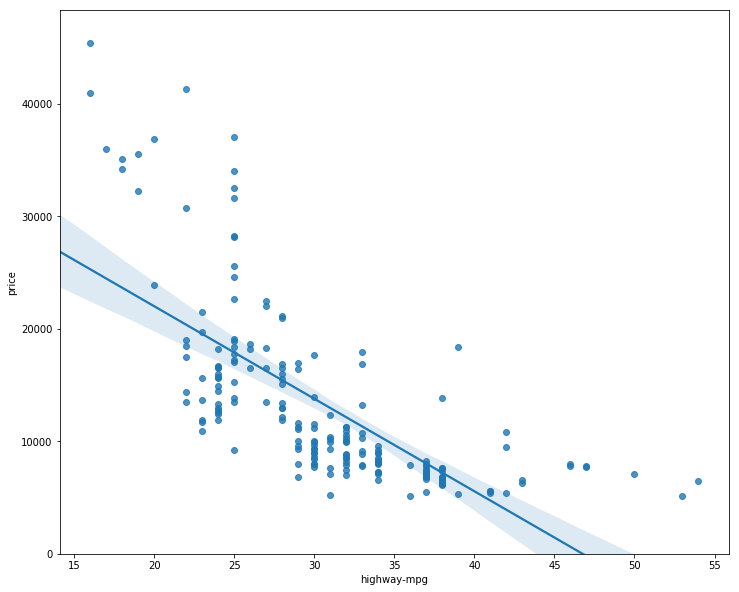

In [19]:
height = 10
width = 12
plt.figure(figsize=(width,height))
sns.regplot(x = 'highway-mpg',y = 'price',data=df)
plt.ylim(0,)

(0, 47422.919330307624)

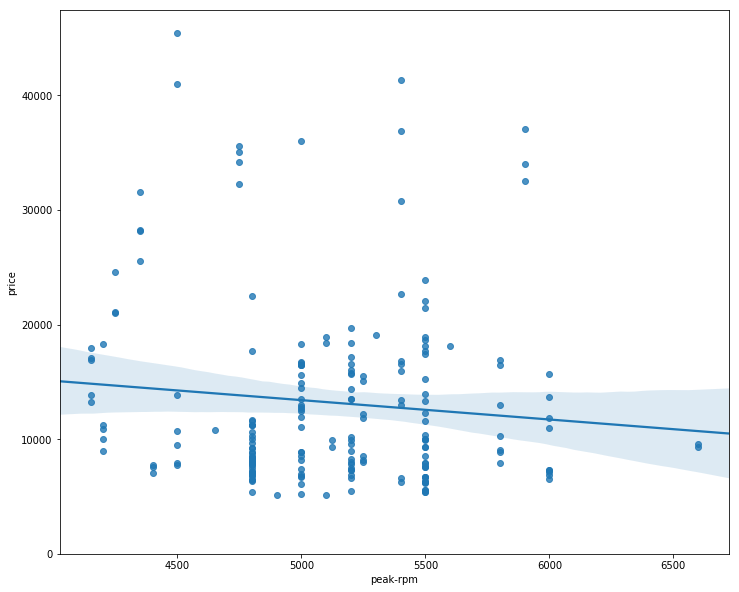

In [20]:
plt.figure(figsize=(width,height))
sns.regplot(x = 'peak-rpm',y = 'price',data = df)
plt.ylim(0,)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>

</div><b>Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method  ".corr()" to verify your answer.</b>

In [21]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Residual Plot

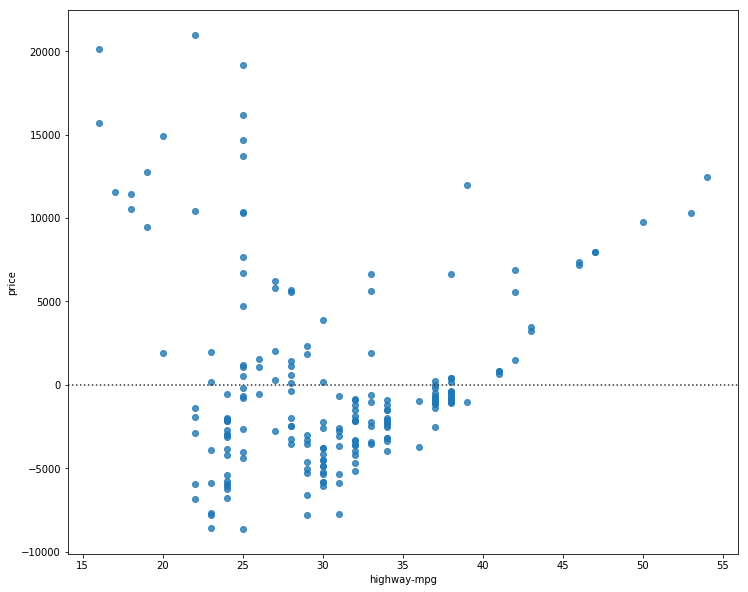

In [22]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

## Visualizing Multiple Linear Regression

In [23]:
Y_hat = lm2.predict(Z)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

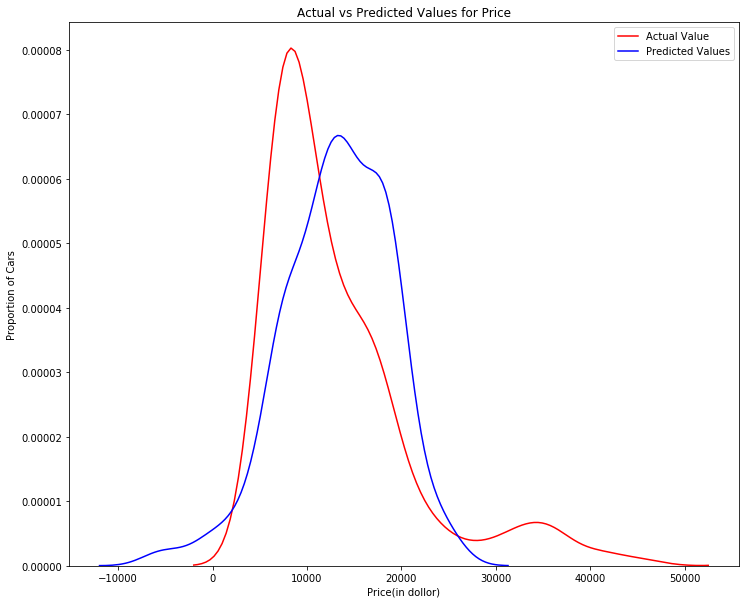

In [24]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = "Actual Value")
sns.distplot(Yhat, hist = False, color ='b', label = "Predicted Values", ax = ax1)

plt.title("Actual vs Predicted Values for Price")
plt.xlabel("Price(in dollor)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

### Distribution graph with more than one varibale which is more accurate

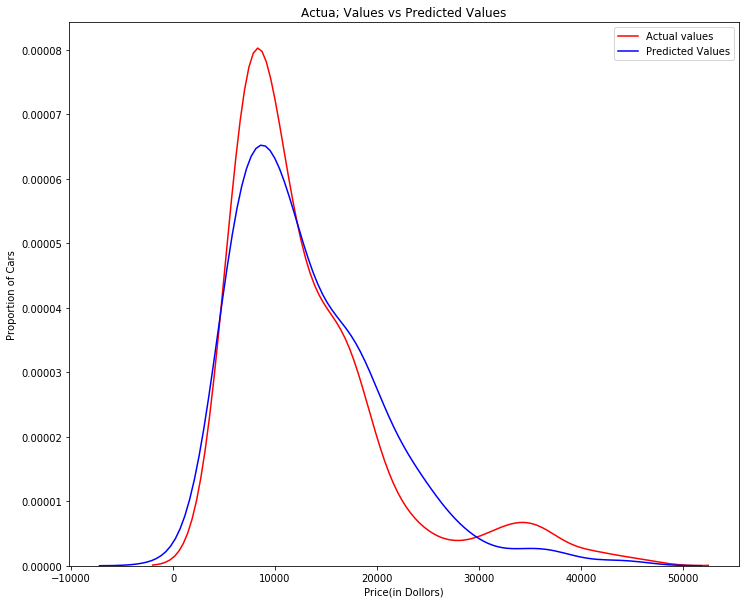

In [25]:
plt.figure(figsize=(width,height))

ax2 = sns.distplot(df['price'], hist = False, color = 'r', label = "Actual values")
sns.distplot(Y_hat, hist = False, color = 'b', label = "Predicted Values", ax = ax2)

plt.title("Actua; Values vs Predicted Values")
plt.xlabel("Price(in Dollors)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

# 4. Polynomial Regression

In [26]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable,dependent_variable,'.',x_new, y_new)
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length ")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [27]:
x = df['highway-mpg']
y = df['price']

In [28]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


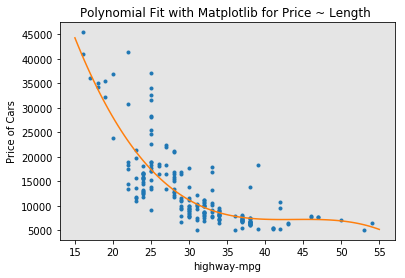

In [29]:
PlotPolly(p,x,y,'highway-mpg')

In [30]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>

</div><b>Create 11 order polynomial model with the variables x and y from above?</b>

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


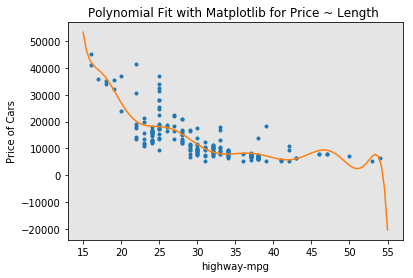

In [31]:
f =  np.polyfit(x,y,11)
p1 = np.poly1d(f)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

### Transforming Polynomials

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
pr = PolynomialFeatures()
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [34]:
Z_pr = pr.fit_transform(Z)

In [35]:
Z.shape

(201, 4)

In [36]:
Z_pr.shape

(201, 15)

## 5. Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [39]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [40]:
pipe.fit(Z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [41]:
yPipe = pipe.predict(Z)
yPipe[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>

</div><b>Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</b>

In [42]:
Input1 = [('scaler',StandardScaler()),('model',LinearRegression())]
pipe1 = Pipeline(Input1)
pipe1.fit(Z,y)
ypipe1 = pipe1.predict(Z)
ypipe1[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

## 6. Measures for In-sample Evaluation

<ul>
    <li><b>R-Squared (R^2)</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
    
</ul>

### Model 1: Simple Linear Regression

Let's calculate the R^2

In [43]:
lm.fit(X,Y)
# Find the R^2
print("The R-Squared is: ", lm.score(X,Y))

The R-Squared is:  0.4965911884339175


Let's calculate Mean Squared Error (MSE)

In [44]:
Yhat = lm.predict(X)
print("The output of the first four predicted value is : ", Yhat[0:4])

The output of the first four predicted value is :  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mse = mean_squared_error(df['price'],Yhat)
print("Mean squared Error: ", mse)

Mean squared Error:  31635042.944639895


### Model 2: Multiple Linear Regression 

Let's calculate R^2 

In [47]:
lm.fit(Z,df['price'])
print("R-Squared : ",lm.score(Z,df['price']))

R-Squared :  0.8093562806577457


In [48]:
Y_predict_multifit = lm.predict(Z)

In [49]:
print("Mean Squared Error : ",mean_squared_error(df['price'],Y_predict_multifit))

Mean Squared Error :  11980366.87072649


### Model 3: Polynomial Fit

In [50]:
from sklearn.metrics import r2_score

In [51]:
r_squared = r2_score(y,p(x))
print("R-Squared: ",r_squared)

R-Squared:  0.6741946663906513


Let's calculate MSE

In [52]:
mean_squared_error(df['price'],p(x))

20474146.42636125